## Simulating data to benchmark FC algorithms

In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat, loadmat
import os
import networkx as nx

In [2]:
# defining parameters

# general
identifier='sim06_2022-04-19_r1'
# standardised format 
    #'sim##_YYYY_MM_DD_r#'; 
        #'sim##' is incremented for a different network instantiation, 
        #'r#' is incrememnted for different simulations of same network instantiation
deve_nw_path='C:/Users/Jure/Documents/CossartLab/code/deve-networks/data' # path to general ('ani' and 'sim') data folder

# topology
top = 'sfree' # 'rand' (random) or 'sfree' (scale-free)

# dynamics
sig = 0.08 # independent noise
N = 250 # neurons
threshold = 1 
reset = 0.9 # reset value after a spike initiation
refractory = 2*ms # absolute refracotry period
rest_pot_I = 0.9 # steady state value for membrane dynamics ('resting potential')
mem_tau = 10*ms # membrane time constant
syn_w = 0.06 # synaptic weight
syn_dt = 1*ms # synaptic delay
p_connect = 0.01 if top == 'rand' else print('') # synnaptic connection probability




In [3]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

WARNING    C:\Users\Jure\AppData\Local\Temp\ipykernel_7000\3807707499.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()
 [py.warnings]


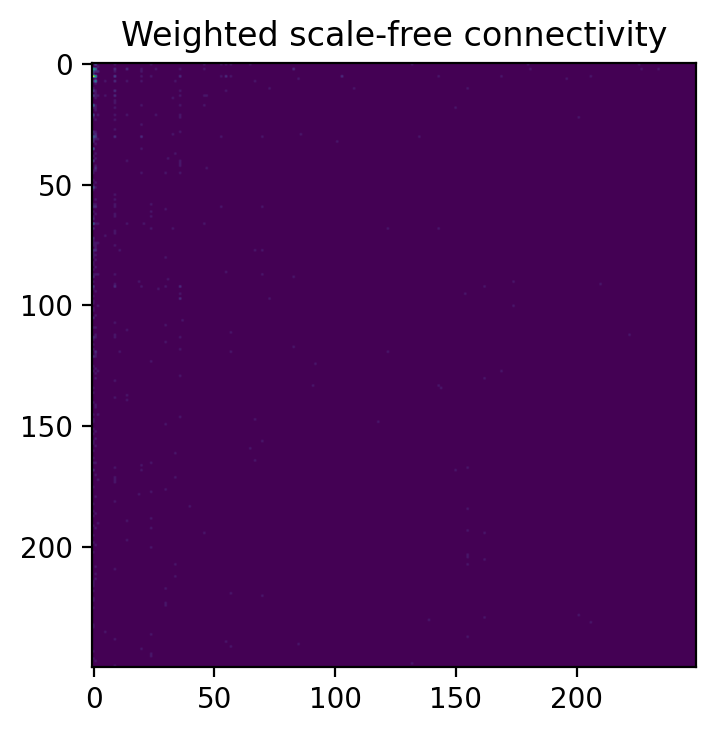

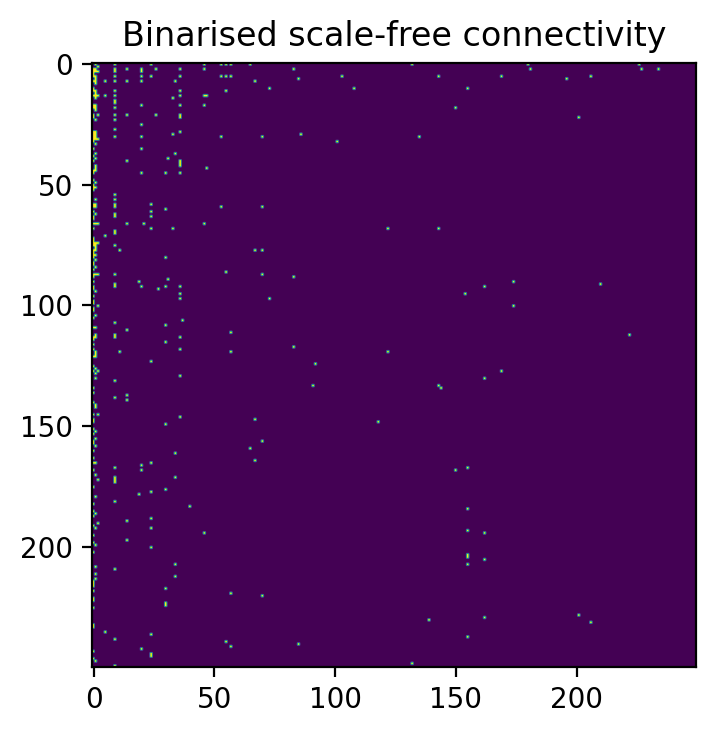

In [4]:
G = nx.scale_free_graph(N, seed=42)
adj = nx.adjacency_matrix(G).toarray()
np.fill_diagonal(adj, 0) # this will somewhat alter scale-free topology
adj_bin = np.copy(adj) 
adj_bin[adj_bin>=1]=1

plt.figure(dpi=200)
plt.imshow(adj)
plt.title('Weighted scale-free connectivity')
plt.figure(dpi=200)
plt.imshow(adj_bin)
plt.title('Binarised scale-free connectivity')

syns = np.nonzero(adj_bin) # sparse matrix format expected by brian

[189, 23, 16, 2, 3, 2, 5, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[32, 140, 34, 15, 7, 5, 3, 2, 1, 1, 4, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


Text(0.5, 1.0, 'Out degree distribution')

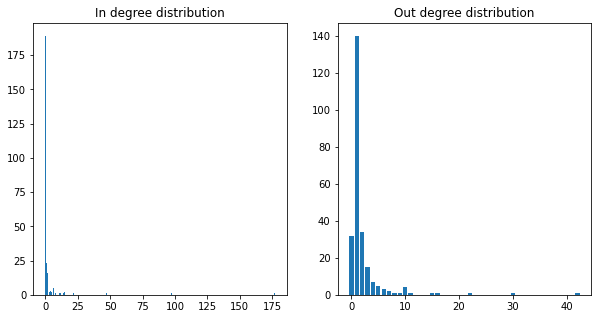

In [5]:
in_hist = degree_histogram_directed(G, in_degree=True)
out_hist = degree_histogram_directed(G, out_degree=True)
print(in_hist)
print(out_hist)

sig = 1e-8


_, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].bar(range(0,len(in_hist)), in_hist)
axs[0].set_title('In degree distribution')
axs[1].bar(range(0,len(out_hist)), out_hist)
axs[1].set_title('Out degree distribution')


WARNING    C:\Users\Jure\AppData\Local\Temp\ipykernel_7000\2345293852.py:30: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(sf_graph).toarray()
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Starting simulation at t=0. s for a duration of 12. s
4.7332 s (39%) simulated in 10s, estimated 15s remaining.
9.4664 s (78%) simulated in 20s, estimated 5s remaining.
12. s (100%) simulated in 24s


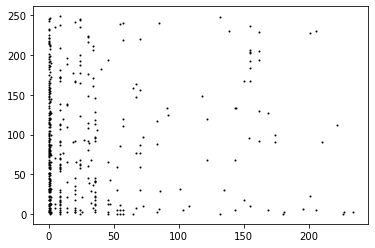

In [6]:
# define neurons and connectivity

start_scope()

eqs = '''
dv/dt = (I-v)/tau + sig*xi*tau**-0.5: 1
I : 1
tau : second
'''

G = NeuronGroup(N, eqs, threshold=f'v>{threshold}', reset=f'v = {reset}', refractory=refractory, method='euler')
G.I = rest_pot_I
G.tau = mem_tau #originally 10
S = Synapses(G, G, on_pre=f'v_post += {syn_w}', delay=syn_dt)

if top == 'rand':
    
    # connecting randomly
    S.connect(condition='i!=j', p=p_connect)

    # visualise connectivity
    figure()
    scatter(S.i, S.j, s=1, c='k')
    savefig('ground_truth.png')
    
elif top == 'sfree':
    
    # getting scale free network
    sf_graph = nx.scale_free_graph(N, seed=42)
    adj = nx.adjacency_matrix(sf_graph).toarray()
    np.fill_diagonal(adj, 0) # this will somewhat alter scale-free topology
    adj_bin = np.copy(adj) 
    adj_bin[adj_bin>=1]=1
    syns = np.nonzero(adj_bin) # sparse matrix format expected by brian
    
    # connecting scale-freely
    S.connect(i=syns[1],j=syns[0]) # hmmm - here think which are the incoming and which the outgoing

    # visualise connectivity
    figure()
    scatter(S.i, S.j, s=1, c='k')
    savefig('ground_truth.png')    
    
# run experiment
spikemon = SpikeMonitor(G)

run_for = 12 # 1200 originally ('20 minutes')
run(run_for*second, report='stdout', report_period=10*second)

In [7]:
# binning at a particular imaging rate (binarised raster) and getting correlation matrix
imaging_rate = 40
n_neurons = N
all_hist = np.zeros((n_neurons, run_for*imaging_rate))
for n in range(n_neurons):
    all_hist[n,:] = np.histogram(spikemon.t[spikemon.i==n], bins=np.arange(0,run_for+0.0001,1/imaging_rate))[0]
    #all_hist.append(n_hist[0])

corr_mat = np.corrcoef(all_hist>2)
#adding zeros to diagonal (no self-connections) - for better visualisation
np.fill_diagonal(corr_mat, 0)

WARNING    C:\Users\Jure\miniconda3\envs\fc-simulations\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
 [py.warnings]


In [8]:
# exporting simulated data to compare different FC inference techniques

sim_data = {'syn_i': np.copy(S.i),
            'syn_j': np.copy(S.j),
           'st': np.copy(spikemon.t),
           'si': np.copy(spikemon.i),
           'imaging_rate': imaging_rate,
           'sts_binned': all_hist,
           'corr_mat': corr_mat}

t_stamp =  str(np.datetime64('now')).replace('-','').replace('T','_').replace(':', '')

os.makedirs(f'{deve_nw_path}/{identifier}/', exist_ok=False)

np.save(f'{deve_nw_path}/{identifier}/{identifier}.npy', sim_data)
savemat(f'{deve_nw_path}/{identifier}/{identifier}.mat', sim_data)

## Plotting everything

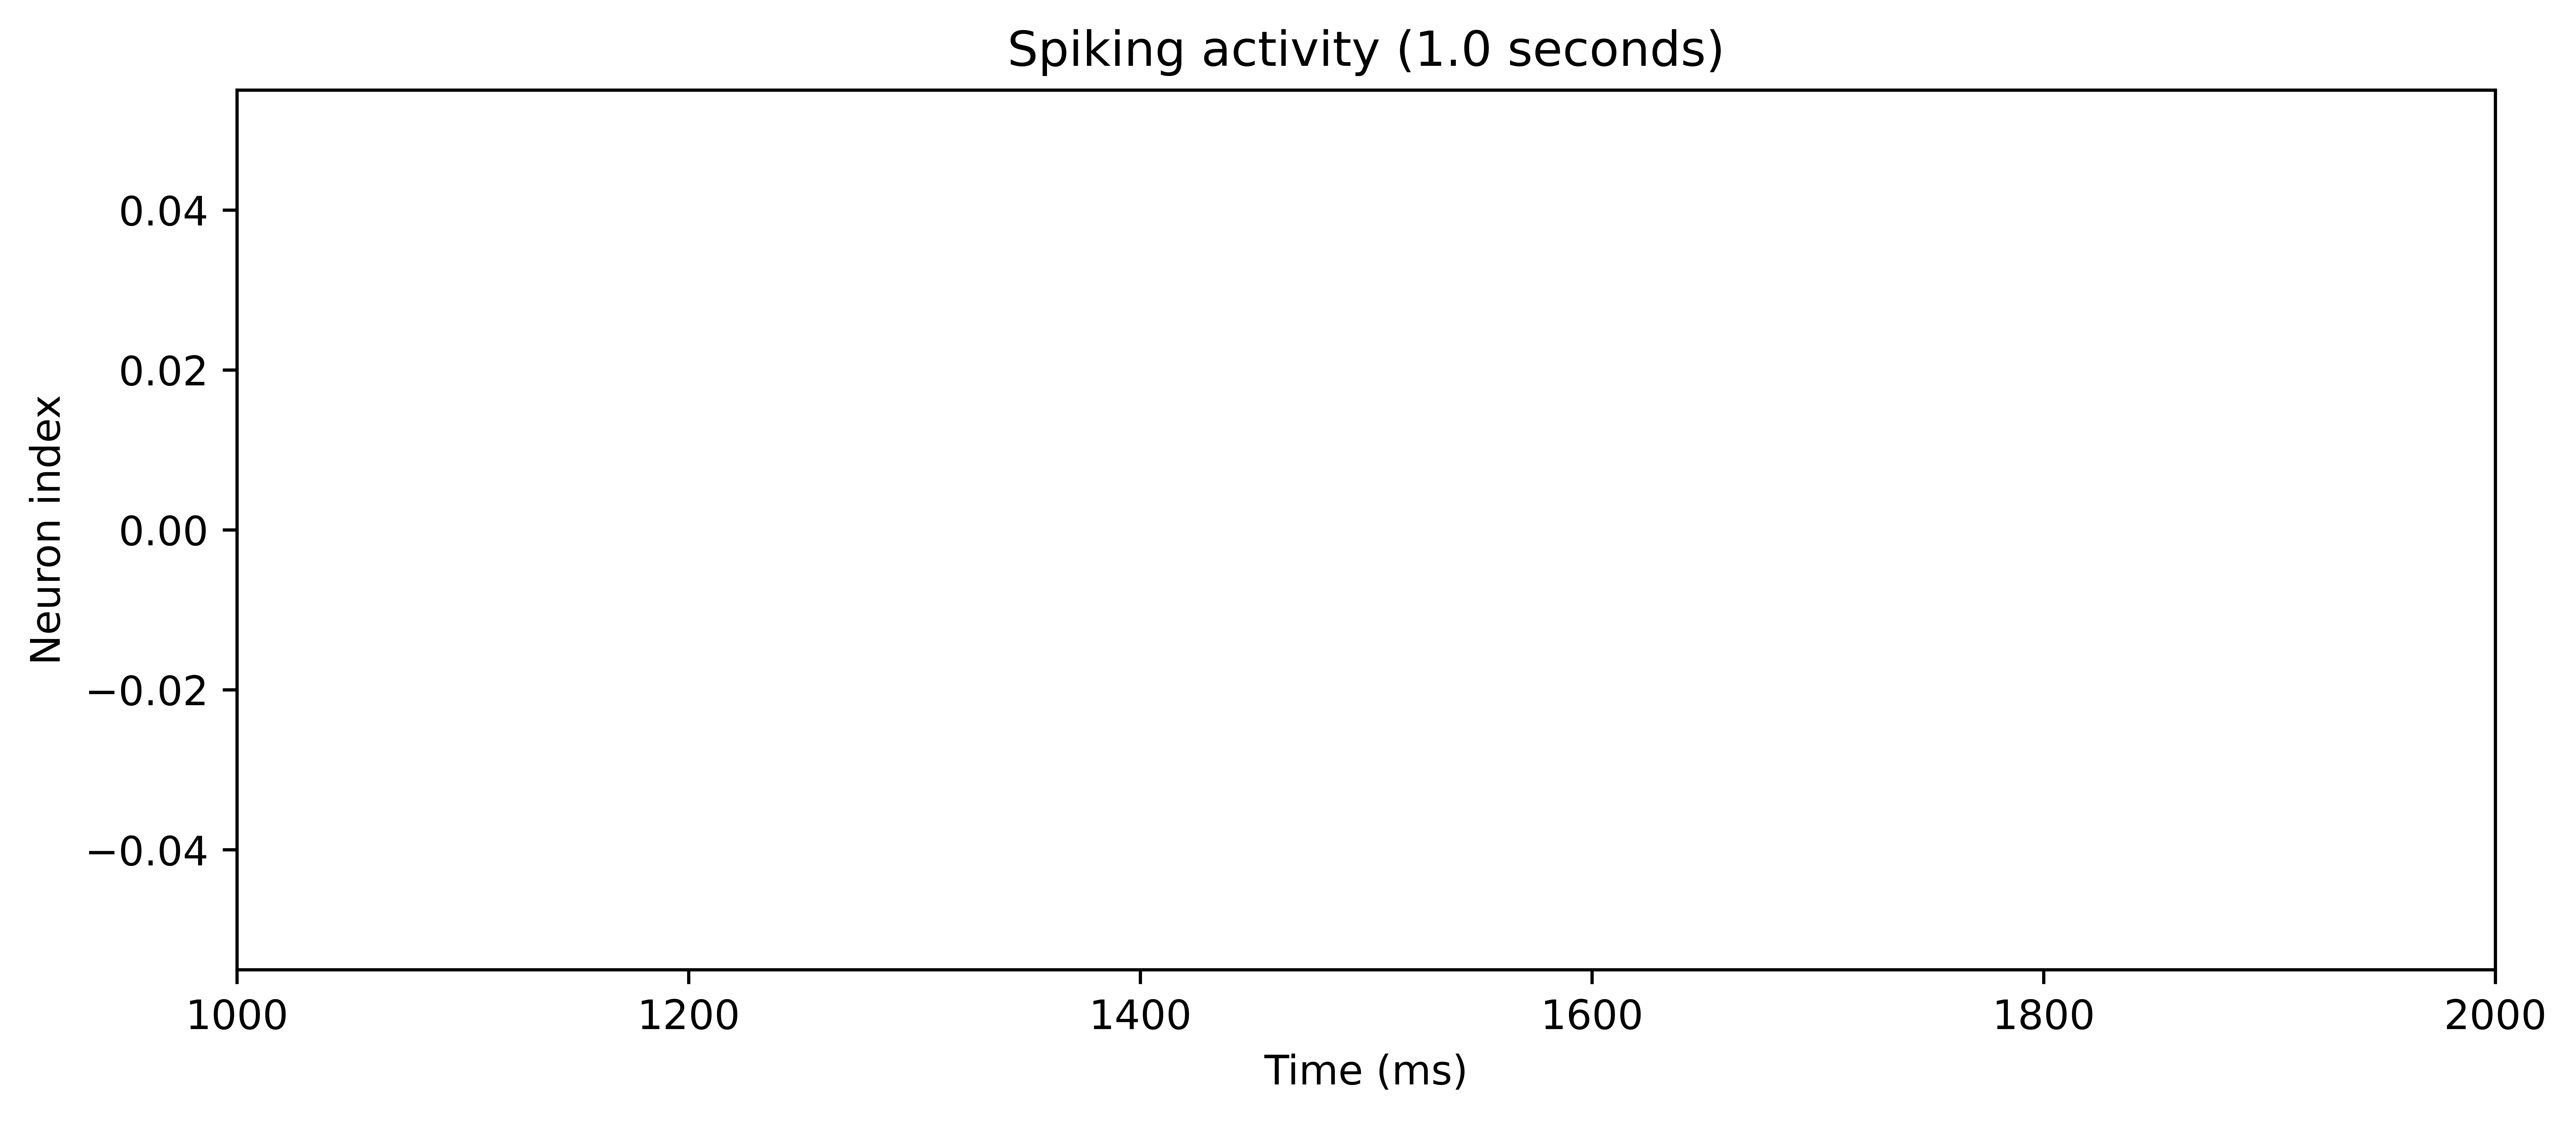

In [9]:
# plot spike times for each neuron (true raster)
xlim = [1000, 2000]
plt.figure(figsize=(10, 4), dpi=1000)
plt.scatter(spikemon.t[spikemon.i<100]/ms, spikemon.i[spikemon.i<100], s=0.1, c='k') # t is spike time, i is neuron id
xlabel('Time (ms)')
ylabel('Neuron index')
title(f'Spiking activity ({(xlim[1]-xlim[0])/1e3} seconds)')
plt.xlim(xlim)
savefig(f'figures/{t_stamp}_spiking_data.png')

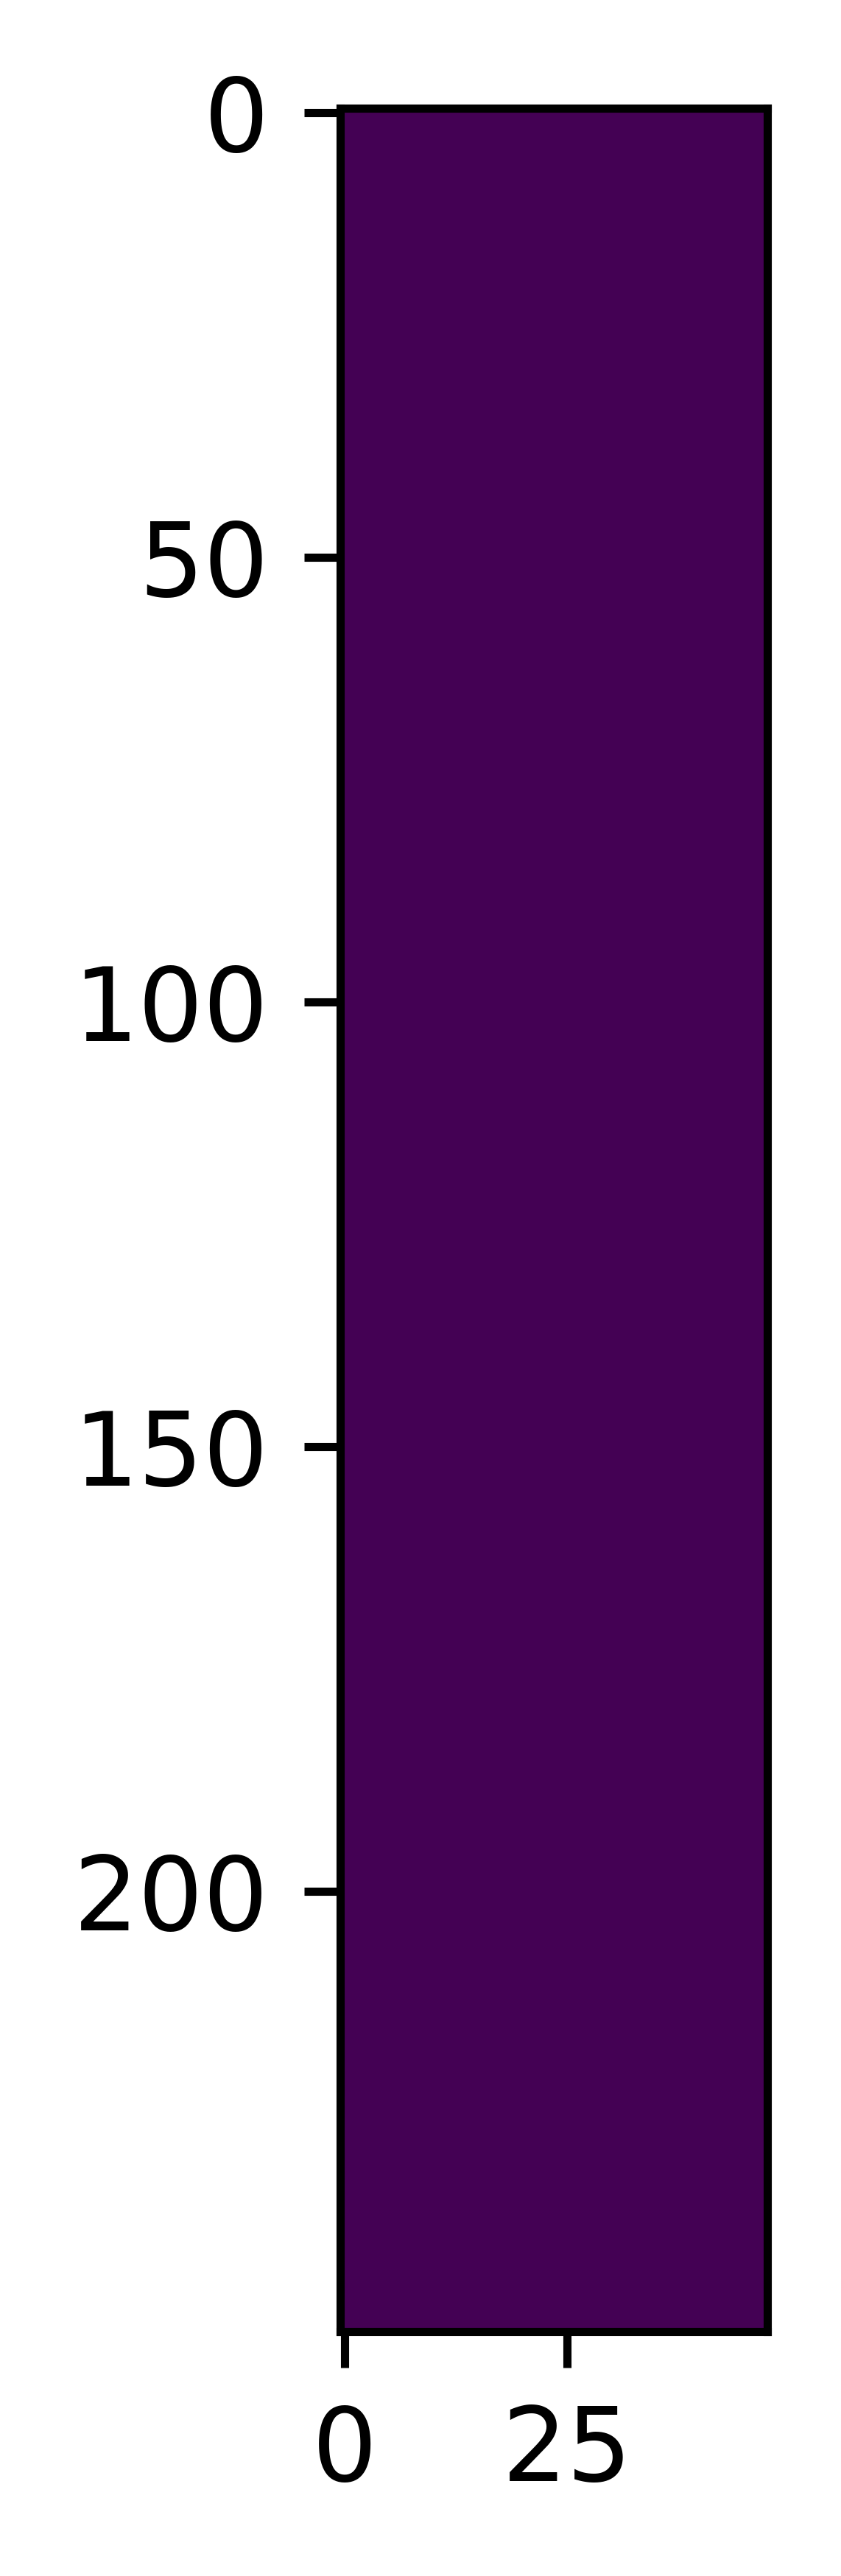

In [10]:
# plot histogram at a particular imaging rate
plt.figure(figsize=(10, 4), dpi=1000)
plt.imshow(all_hist)
savefig(f'figures/{t_stamp}_binned_30.png')

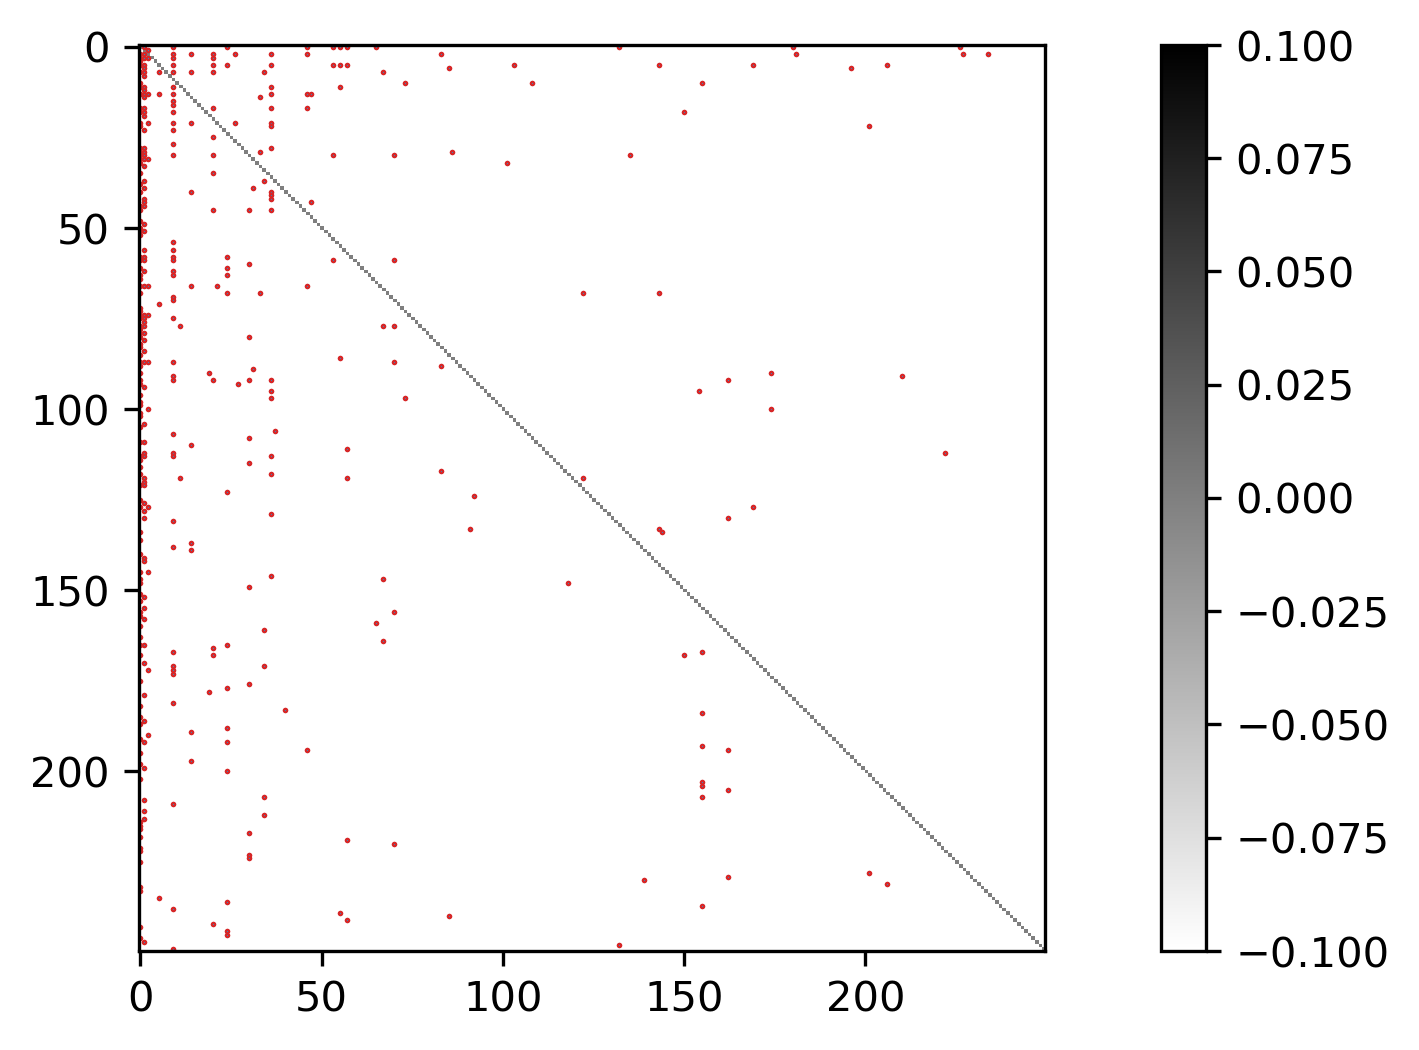

In [11]:
# THIS IS WITHOUT BINARISING but with binning + adding zeros on diagonal
#plotting
plt.figure(figsize=(10, 4), dpi=300)
plt.imshow(corr_mat, cmap='binary')
plt.colorbar()
scatter(S.i, S.j, s=0.1, facecolors=None, edgecolors='C3', marker='X')
savefig(f'figures/{t_stamp}_emp_vs_gt_directed.png')

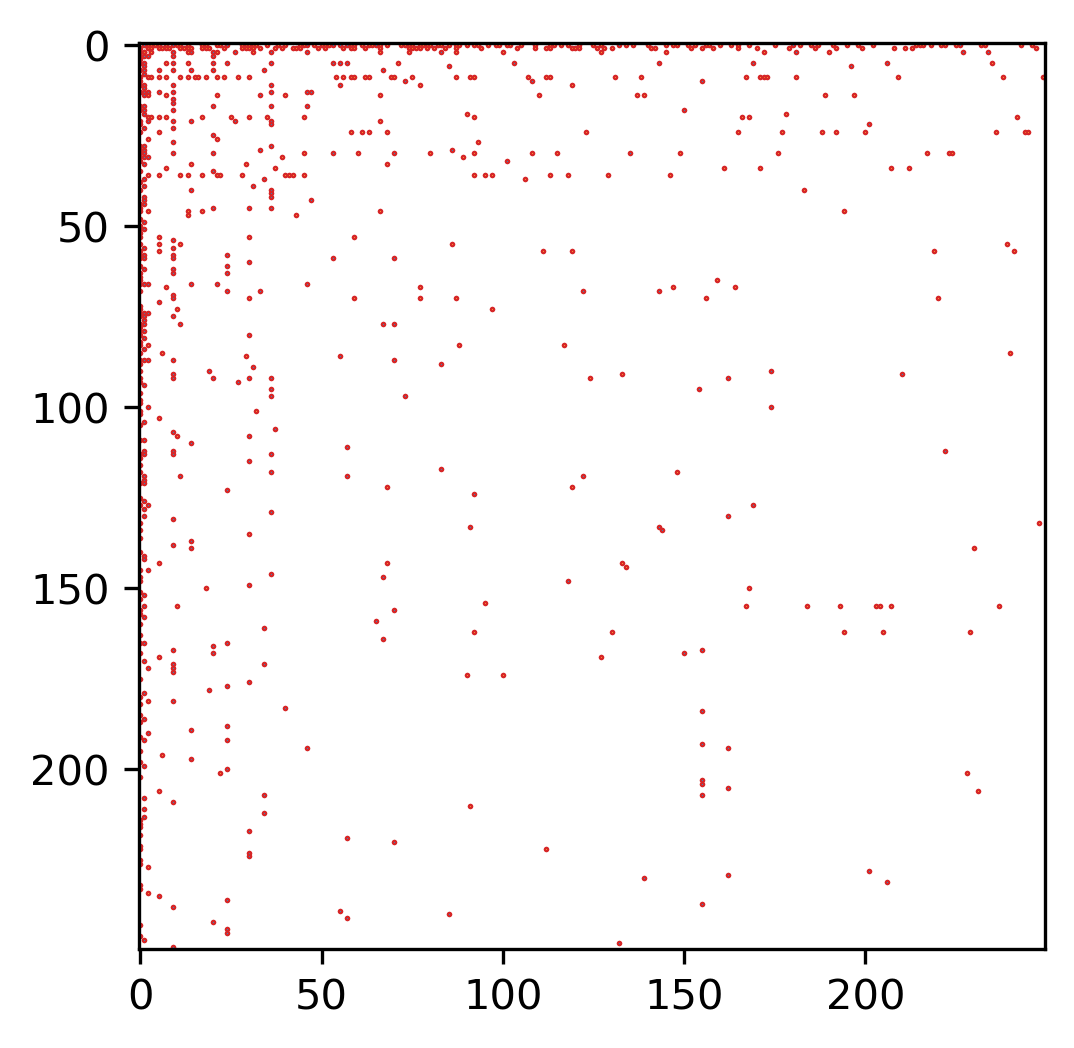

In [12]:
plt.figure(figsize=(10, 4), dpi=300)
plt.imshow(corr_mat, cmap='binary')
scatter(S.i, S.j, s=0.1, facecolors=None, edgecolors='C3', marker='X')
scatter(S.j, S.i, s=0.1, facecolors=None, edgecolors='C3', marker='X')
savefig(f'figures/{t_stamp}_emp_vs_gt_undirected.png')

## Comparing to MATLAB inference